In [38]:
#1
import pandas as pd


In [39]:
#2
print(pd.__version__)

1.1.3


In [40]:
#2
!pip show pandas

Name: pandas
Version: 1.1.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\anaconda-2021\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn


In [41]:
#3
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : db08276bc116c438d3fdee492026f8223584c477
python           : 3.8.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 7
Version          : 6.1.7601
machine          : AMD64
processor        : AMD64 Family 20 Model 2 Stepping 0, AuthenticAMD
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_India.1252

pandas           : 1.1.3
numpy            : 1.19.2
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.2.4
setuptools       : 50.3.1.post20201107
Cython           : 0.29.21
pytest           : 6.1.1
hypothesis       : None
sphinx           : 3.2.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.7
lxml.etree       : 4.6.1
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.19.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck       : 1.3.2
f

In [42]:
#4
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']
       }

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']




In [43]:
#4
df = pd.DataFrame(data , index=labels)
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


In [44]:
#5
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [45]:
#6
df.iloc[:3]


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [46]:
#7
df.loc[:, ['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [47]:
#8
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [48]:
#9
df[df['visits'] > 3]

,animal,age,visits,priority


In [49]:
#10
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [50]:
#11
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


In [51]:
#12
df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [52]:
#13
df.loc['f', 'age'] = 1.5


In [53]:
#14
df['visits'].sum()


19

In [54]:
#15
df.groupby('animal')['age'].mean()


animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [55]:
#16
df.loc['k'] = [5.5, 'dog', 'no', 2]

df = df.drop('k')
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7,2,no
j,dog,3,1,no


In [56]:
#17
df['animal'].value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

In [57]:
#18
df.sort_values(by=['age', 'visits'], ascending=[False, True])


,animal,age,visits,priority
i,dog,7,2,no
e,dog,5,2,no
g,snake,4.5,1,no
j,dog,3,1,no
b,cat,3,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [58]:
#19
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,3,1,False


In [59]:
#20
df['animal'] = df['animal'].replace('snake', 'python')
df


,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,3,1,False


In [183]:
#21
import numpy as np
import pandas as pd

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']
       }

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data , index=labels)
print(df)




  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


In [187]:
df.pivot_table(data,index='animal', columns='visits', aggfunc='mean')

age          
visits    1    2    3
animal               
cat     2.5  NaN  2.5
dog     3.0  6.0  NaN
snake   4.5  0.5  NaN

In [61]:
#22
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})


In [62]:
#22
df.loc[df['A'].shift() != df['A']]


,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [63]:
#23
df = pd.DataFrame(np.random.random(size=(5, 3)))

In [64]:
df.sub(df.mean(axis=1), axis=0)

,0,1,2
0,-0.234176,-0.112466,0.346643
1,0.232949,-0.316032,0.083083
2,0.517145,-0.250691,-0.266454
3,-0.161056,0.111285,0.049771
4,0.035766,0.067128,-0.102894


In [65]:
#24
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df


,a,b,c,d,e,f,g,h,i,j
0,0.079054,0.701800,0.436678,0.146668,0.978302,0.701875,0.966770,0.935539,0.488770,0.492128
1,0.658253,0.103999,0.995101,0.847110,0.066054,0.918231,0.982275,0.323056,0.573597,0.718138
2,0.394967,0.480910,0.802732,0.458366,0.446415,0.260260,0.889421,0.037379,0.638461,0.502398
3,0.073421,0.429284,0.807087,0.399965,0.300794,0.835350,0.660987,0.945600,0.612372,0.649088
4,0.577958,0.633345,0.319441,0.693613,0.105478,0.287785,0.949235,0.887342,0.792603,0.327933


In [66]:
#24
df.sum().idxmin()


'a'

In [67]:
#25
len(df.drop_duplicates(keep=False))


5

In [68]:
#26
(df.isnull().cumsum(axis=1) == 3).idxmax(axis=1)


0    a
1    a
2    a
3    a
4    a
dtype: object

In [69]:
#27
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

In [70]:

df.groupby('grps')['vals'].nlargest(3).sum(level=0)


grps
a    409
b    156
c    345
Name: vals, dtype: int64

In [71]:
#28 final : this is the final first step
data = {'A':np.arange(0, 101),
        'B':np.arange(101, 202)}
df = pd.DataFrame(data)
df

,A,B
0,0,101
1,1,102
2,2,103
3,3,104
4,4,105
...,...,...
96,96,197
97,97,198
98,98,199
99,99,200


In [72]:
#28 final : this is the final second step
df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()

A
(0, 10]      1065
(10, 20]     1165
(20, 30]     1265
(30, 40]     1365
(40, 50]     1465
(50, 60]     1565
(60, 70]     1665
(70, 80]     1765
(80, 90]     1865
(90, 100]    1965
Name: B, dtype: int32

In [76]:
#29
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})


In [77]:

import pandas as pd
import numpy as np
x = (df['X'] != 0).cumsum()
y = x != x.shift()
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


In [78]:
#30
df.unstack().sort_values()[-3:].index.tolist()

[('X', 4), ('X', 6), ('X', 0)]

In [80]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

In [81]:
#31 
def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df.groupby(['grps'])['vals'].transform(replace)
df

,grps,vals
0,a,12
1,a,345
2,a,3
3,b,1
4,b,45
5,c,14
6,a,4
7,a,52
8,b,54
9,c,23


In [82]:
#32 
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
df

,group,value
0,a,1.0
1,a,2.0
2,b,3.0
3,b,NaN
4,a,2.0
5,b,3.0
6,b,NaN
7,b,1.0
8,a,7.0
9,b,3.0


In [83]:
g1 = df.groupby(['group'])['value']                
g2 = df.fillna(0).groupby(['group'])['value']    

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count() 

s.reset_index(level=0, drop=True).sort_index() 


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

In [84]:
#33
import pandas as pd
import numpy as np
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
s

2015-01-01    0.306497
2015-01-02    0.391079
2015-01-05    0.442050
2015-01-06    0.897262
2015-01-07    0.953713
                ...   
2015-12-25    0.775164
2015-12-28    0.436629
2015-12-29    0.923890
2015-12-30    0.867474
2015-12-31    0.244315
Freq: B, Length: 261, dtype: float64

In [85]:
#34
s[s.index.weekday == 2].sum()

23.056066582482412

In [91]:
#35
s.resample('M').mean()


2015-01-31    0.596382
2015-02-28    0.552065
2015-03-31    0.535177
2015-04-30    0.428597
2015-05-31    0.488666
2015-06-30    0.453207
2015-07-31    0.585933
2015-08-31    0.492781
2015-09-30    0.469909
2015-10-31    0.419300
2015-11-30    0.470850
2015-12-31    0.539858
Freq: M, dtype: float64

In [107]:
#36
from pandas.core.resample import TimeGrouper

In [109]:
#36
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
s.groupby(TimeGrouper('4M')).idxmax()


2015-01-31   2015-01-30
2015-05-31   2015-03-24
2015-09-30   2015-06-10
2016-01-31   2015-12-03
Freq: 4M, dtype: datetime64[ns]

In [110]:
#36 one more approach
s.groupby(pd.Grouper(freq="4M")).idxmax()

2015-01-31   2015-01-30
2015-05-31   2015-03-24
2015-09-30   2015-06-10
2016-01-31   2015-12-03
Freq: 4M, dtype: datetime64[ns]

In [112]:
#37
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')


DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [114]:
#38
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [115]:
#38
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [116]:
#39
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp



,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [117]:
#40
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp


,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [119]:
#41
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df = df.drop('From_To', axis=1)


,FlightNumber,RecentDelays,Airline
0,10045.0,"[23, 47]",KLM(!)
1,NaN,[],<Air France> (12)
2,10065.0,"[24, 43, 87]",(British Airways. )
3,NaN,[13],12. Air France
4,10085.0,"[67, 32]","""Swiss Air"""


In [139]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()


frames = [df, temp]

result = pd.concat(frames)
result



,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,NaN,[],<Air France> (12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,NaN,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London
0,NaN,NaN,NaN,London,Paris
1,NaN,NaN,NaN,Madrid,Milan
2,NaN,NaN,NaN,London,Stockholm
3,NaN,NaN,NaN,Budapest,Paris
4,NaN,NaN,NaN,Brussels,London


In [141]:
#42
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM,London,Paris
1,NaN,[],Air France,Madrid,Milan
2,10065.0,"[24, 43, 87]",British Airways,London,Stockholm
3,NaN,[13],Air France,Budapest,Paris
4,10085.0,"[67, 32]",Swiss Air,Brussels,London


In [148]:
#43

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df = df.drop('From_To', axis=1)

delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)

df

,FlightNumber,Airline,delay_1,delay_2,delay_3
0,10045.0,KLM(!),23.0,47.0,NaN
1,NaN,<Air France> (12),NaN,NaN,NaN
2,10065.0,(British Airways. ),24.0,43.0,87.0
3,NaN,12. Air France,13.0,NaN,NaN
4,10085.0,"""Swiss Air""",67.0,32.0,NaN


In [149]:
#44
letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)
s

A  0    0.831521
   1    0.507209
   2    0.488337
   3    0.802794
   4    0.972316
   5    0.736692
   6    0.397152
   7    0.742209
   8    0.539597
   9    0.802302
B  0    0.232903
   1    0.468996
   2    0.269714
   3    0.188249
   4    0.151231
   5    0.948162
   6    0.918642
   7    0.638458
   8    0.820316
   9    0.317178
C  0    0.916052
   1    0.569013
   2    0.577834
   3    0.678914
   4    0.068006
   5    0.141013
   6    0.115950
   7    0.233369
   8    0.792604
   9    0.664400
dtype: float64

In [150]:
#45
s.index.is_lexsorted()

s.index.lexsort_depth == s.index.nlevels



True

In [151]:
#46
s.loc[:, [1, 3, 6]]

A  1    0.507209
   3    0.802794
   6    0.397152
B  1    0.468996
   3    0.188249
   6    0.918642
C  1    0.569013
   3    0.678914
   6    0.115950
dtype: float64

In [152]:
#47
s.loc[pd.IndexSlice[:'B', 5:]]

s.loc[slice(None, 'B'), slice(5, None)]

A  5    0.736692
   6    0.397152
   7    0.742209
   8    0.539597
   9    0.802302
B  5    0.948162
   6    0.918642
   7    0.638458
   8    0.820316
   9    0.317178
dtype: float64

In [153]:
#48
s.sum(level=0)

A    6.820129
B    4.953847
C    4.757154
dtype: float64

In [154]:
#49
s.unstack().sum(axis=0)

0    1.980476
1    1.545218
2    1.335886
3    1.669958
4    1.191552
5    1.825867
6    1.431743
7    1.614035
8    2.152516
9    1.783879
dtype: float64

In [155]:
#50
new_s = s.swaplevel(0, 1)
new_s.index.is_lexsorted()
new_s = new_s.sort_index()
new_s

0  A    0.831521
   B    0.232903
   C    0.916052
1  A    0.507209
   B    0.468996
   C    0.569013
2  A    0.488337
   B    0.269714
   C    0.577834
3  A    0.802794
   B    0.188249
   C    0.678914
4  A    0.972316
   B    0.151231
   C    0.068006
5  A    0.736692
   B    0.948162
   C    0.141013
6  A    0.397152
   B    0.918642
   C    0.115950
7  A    0.742209
   B    0.638458
   C    0.233369
8  A    0.539597
   B    0.820316
   C    0.792604
9  A    0.802302
   B    0.317178
   C    0.664400
dtype: float64

In [1]:
#51
import pandas as pd
data = [{'x': 0, 'y': 0},
        {'x':0, 'y': 1},
        {'x':0, 'y':2},
        ]
 
df = pd.DataFrame(data)
 
df


,x,y
0,0,0
1,0,1
2,0,2


In [ ]:
#52

In [ ]:
#53

In [ ]:
#54

In [ ]:
#55

,xs,ys
0,1,4
1,5,2
2,2,1
3,8,9
4,1,6


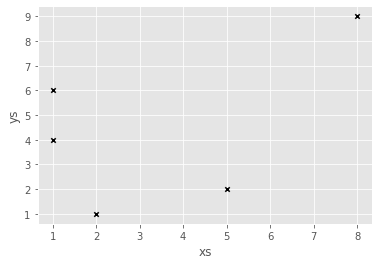

In [164]:
#56
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

df.plot.scatter("xs", "ys", color = "black", marker = "x")
df

In [165]:
#57
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9], "hours_in" :[1,9,6,5,3,9,2,9,1,7,4,2,2], "happiness" :[2,1,3,2,3,1,2,3,1,2,2,1,3], "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
df

,productivity,hours_in,happiness,caffienated
0,5,1,2,0
1,2,9,1,0
2,3,6,3,1
3,1,5,2,1
4,4,3,3,0
5,5,9,1,0
6,6,2,2,0
7,7,9,3,0
8,8,1,1,1
9,3,7,2,1


<AxesSubplot:xlabel='hours_in', ylabel='productivity'>

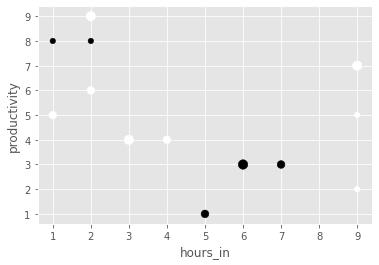

In [166]:
#57
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 30, c = df.caffienated)

In [167]:
#58
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52], "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9], "month":range(12) })
df

,revenue,advertising,month
0,57,2.1,0
1,68,1.9,1
2,63,2.7,2
3,71,3.0,3
4,72,3.6,4
5,90,3.2,5
6,80,2.7,6
7,62,2.4,7
8,59,1.8,8
9,51,1.6,9


(-1.0, 12.0)

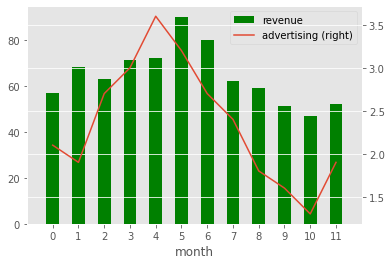

In [168]:
#58
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))



In [170]:
#59
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

def plot_candlestick(agg):
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()


In [171]:
df = day_stock_data()
df.head()

,time,price
0,2022-03-13 09:30:00,100.000000
1,2022-03-13 09:30:08,100.064411
2,2022-03-13 09:30:09,100.120657
3,2022-03-13 09:30:11,100.164472
4,2022-03-13 09:30:14,100.152970


In [172]:
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

,open,high,low,close,color
time,,,,,
2022-03-13 09:00:00,100.000000,101.301195,98.969626,98.969626,red
2022-03-13 10:00:00,98.925035,99.652732,97.217970,97.217970,red
2022-03-13 11:00:00,97.282473,98.570050,96.948936,97.840916,green
2022-03-13 12:00:00,97.886188,100.111989,96.460637,96.892836,red
2022-03-13 13:00:00,96.838533,97.805285,95.552499,95.634250,red


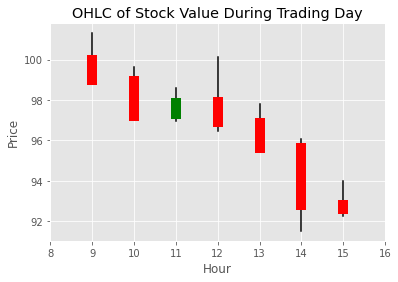

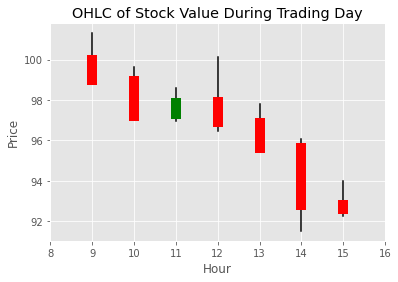

In [173]:
#60
plot_candlestick(agg)
plot_candlestick(agg)
